# Suicide Rates Analyisis from 1985 to 2021

In this project, i'm going to analyze the suicide rates of people around the wordl. Suicide is a real and sad problem, being a very popular death cause. I want to analyze this dataset to understand and recognize patterns on several factors that can be relationated to this act, and to see the countries that are more afected by this problem.

I will try to answer the following questions:
* Which are the countries with the higher suicide rates in the timeline? and the ones with the lower?
* What year was the one that had the higher suicide rate worldwide?
* What is the relation (of %) between men and women in suicides?
* What is the most popular suicide age-rank among man and woman?
* How the GDP per capita affects the suicide rate?
* How is the suicide rate in Chile through this time period?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [2]:
suicides = pd.read_csv('suicide_rates.csv')
suicides.head(6)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers
5,Albania,1987,female,75+ years,1.0,35600,2.81,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation


In [3]:
# dataset info
suicides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


Let's see the count of null values in the different features.

In [4]:
suicides.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
# assuming that a null value in a row means 0 suicides that year in that country, i'm going to fill all those values with 0.
suicides['suicides_no'] = suicides['suicides_no'].fillna(0)

## Which are the countries with the higher suicide rates in the timeline? and the ones with the lower?

To answer this question, we need to calculate the suicide rate for each country, using the rates of all the years involved.

In [6]:
# see how many different countries are in the dataset
suicides.country.nunique()

114

In [7]:
rates = suicides.groupby('country')['suicides/100k pop'].mean().reset_index() # calculate the mean for each country
rates = rates.sort_values(by='suicides/100k pop', ascending=False) # sort the countries by rates
rates_head = rates.head(15)
rates_head

,country,suicides/100k pop
82,Republic of Korea,45.869891
98,Sri Lanka,35.295152
59,Lithuania,34.468115
85,Russian Federation,30.449826
45,Hungary,28.507057
53,Kazakhstan,26.589384
11,Belarus,26.167581
57,Latvia,24.792562
95,Slovenia,23.619350
107,Ukraine,23.366349


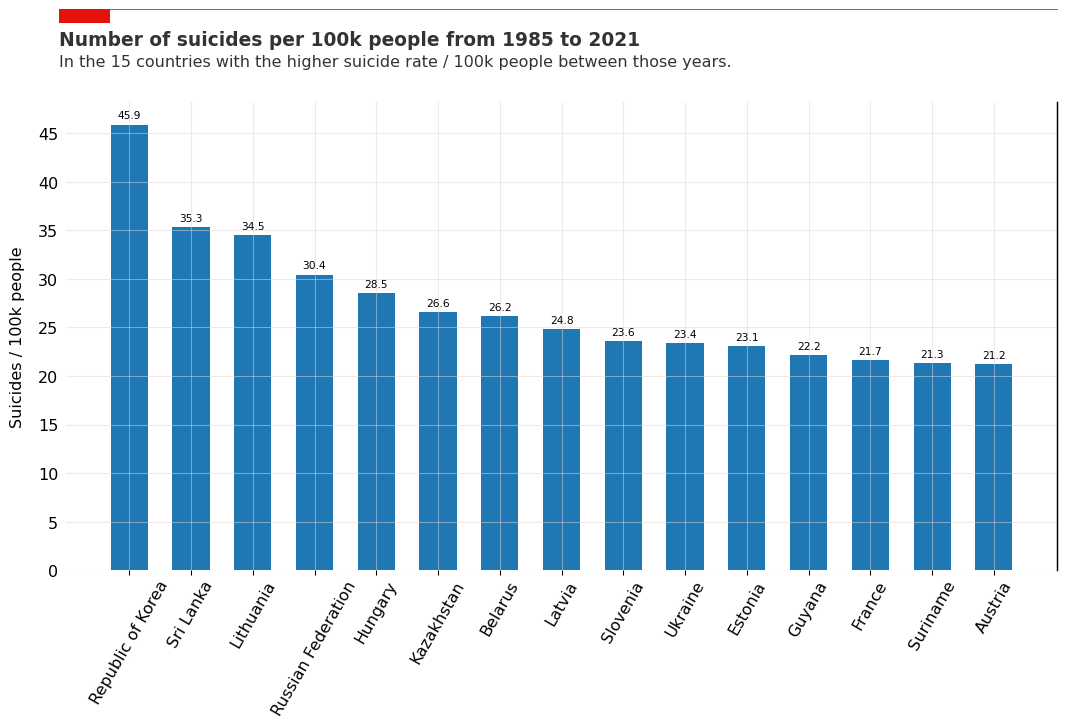

In [8]:
# plot the 15 countries with the higher suicide rate
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)
bar1 = ax.bar(rates_head['country'], rates_head['suicides/100k pop'], width=0.6)
# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=60)

# Reformat y-axis
ax.set_ylabel('Suicides / 100k people', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.1f}' for e in rates_head['suicides/100k pop']], padding=3, color='black', fontsize=8) 

# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s="Number of suicides per 100k people from 1985 to 2021", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.12, y=.90, s="In the 15 countries with the higher suicide rate / 100k people between those years.", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

We can see the 15 countries with the higher suicide rate. Republic of Korea is by far the one with the most! Above, i'm goint to show the 15 countries with the lower suicide rate.

In [9]:
rates.tail(15)

,country,suicides/100k pop
50,Jamaica,0.521765
1,Antigua and Barbuda,0.481559
71,North Macedonia,0.440759
111,United States of America,0.388990
31,Dominican Republic,0.264581
16,Brunei Darussalam,0.153673
76,Peru,0.059405
102,Tajikistan,0.041314
58,Lebanon,0.010449
52,Jordan,0.005245


## What year was the one that had the higher suicide rate worldwide?

This is a question that i have just for curiosity. To do this, we have to count the amount of suicides for each year for all the countries involved in the dataset.

In [10]:
suicides_by_year = suicides.groupby('year')['suicides/100k pop'].mean().reset_index()
sorted_years = suicides_by_year.sort_values(by='suicides/100k pop', ascending=False)
sorted_years.head(10) # Let' see the top 10 years with the most suicides per 100k people

,year,suicides/100k pop
10,1995,15.662671
11,1996,15.305422
12,1997,14.954361
13,1998,14.926920
14,1999,14.532038
9,1994,14.073272
15,2000,13.941328
8,1993,13.833705
17,2002,13.786550
16,2001,13.519138


So, apperently the late 90s was a time when people tended more to suicide. Why is that? Is there any specific country with a specially high suicide rate in that year?

In [11]:
suicides_1995 = suicides.loc[(suicides.year == 1995)]
suicides_1995_sorted = suicides_1995.sort_values(by='suicides/100k pop', ascending=False)
suicides_1995_sorted.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1258,Aruba,1995,male,75+ years,2.0,889,224.97,Aruba1995,NaN,"1,32,06,70,391",17949.0,G.I. Generation
11412,Hungary,1995,male,75+ years,282.0,169919,165.96,Hungary1995,0.740,"46,41,89,16,500",4767.0,G.I. Generation
15044,Lithuania,1995,male,35-54 years,632.0,436306,144.85,Lithuania1995,0.701,"7,87,07,82,261",2324.0,Boomers
15045,Lithuania,1995,male,75+ years,67.0,47214,141.91,Lithuania1995,0.701,"7,87,07,82,261",2324.0,G.I. Generation
8354,Estonia,1995,male,35-54 years,227.0,180939,125.46,Estonia1995,0.719,"4,37,36,65,146",3224.0,Boomers
1906,Austria,1995,male,75+ years,184.0,147262,124.95,Austria1995,0.815,"2,41,03,82,83,063",32237.0,G.I. Generation
6666,Cuba,1995,male,75+ years,248.0,199400,124.37,Cuba1995,0.653,"30,42,98,03,651",2993.0,G.I. Generation
15046,Lithuania,1995,male,55-74 years,325.0,274196,118.53,Lithuania1995,0.701,"7,87,07,82,261",2324.0,Silent
14792,Latvia,1995,male,55-74 years,239.0,203600,117.39,Latvia1995,0.670,"5,78,83,68,511",2438.0,Silent
22520,Singapore,1995,male,75+ years,32.0,28200,113.48,Singapore1995,0.773,"87,89,00,09,877",31783.0,G.I. Generation


In [12]:
suicides_1996 = suicides.loc[(suicides.year == 1996)]
suicides_1996_sorted = suicides_1996.sort_values(by='suicides/100k pop', ascending=False)
suicides_1996_sorted.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
15056,Lithuania,1996,male,35-54 years,664.0,438770,151.33,Lithuania1996,NaN,"8,38,51,09,020",2484.0,Boomers
11424,Hungary,1996,male,75+ years,254.0,176106,144.23,Hungary1996,NaN,"46,65,97,96,773",4792.0,G.I. Generation
8366,Estonia,1996,male,75+ years,22.0,17605,124.96,Estonia1996,NaN,"4,74,61,09,767",3536.0,G.I. Generation
1918,Austria,1996,male,75+ years,188.0,151691,123.94,Austria1996,NaN,"2,37,25,09,48,791",31660.0,G.I. Generation
8367,Estonia,1996,male,35-54 years,217.0,178056,121.87,Estonia1996,NaN,"4,74,61,09,767",3536.0,Boomers
15057,Lithuania,1996,male,55-74 years,336.0,275843,121.81,Lithuania1996,NaN,"8,38,51,09,020",2484.0,Silent
23048,Slovenia,1996,male,75+ years,30.0,26100,114.94,Slovenia1996,NaN,"21,48,00,23,017",11346.0,G.I. Generation
4676,Bulgaria,1996,male,75+ years,191.0,166200,114.92,Bulgaria1996,NaN,"10,10,96,12,142",1270.0,G.I. Generation
6678,Cuba,1996,male,75+ years,228.0,201400,113.21,Cuba1996,NaN,"25,01,73,00,000",2443.0,G.I. Generation
3260,Belarus,1996,male,35-54 years,1391.0,1298200,107.15,Belarus1996,NaN,"14,75,68,46,154",1524.0,Boomers


We can clearly see a pattern: There where a lot of suicides in East European countries a few years post the disolution of the URSS. That is a really interesting data to investigate.

## What is the relation (of %) between man and woman in suicides?

In order to answer this question we need to get the total number of suicides around the world, separating them between man and woman.

In [13]:
# just get the rows with a relevant suicides number
suicides_not_zero = suicides.loc[(suicides['suicides_no'] > 0)]

In [14]:
man_suicides = suicides_not_zero.loc[(suicides['sex'] == 'male')]
total_man_suicides = man_suicides['suicides_no'].sum()
total_man_suicides

5540857.0

In [15]:
woman_suicides = suicides_not_zero.loc[(suicides['sex'] == 'female')]
total_woman_suicides = woman_suicides['suicides_no'].sum()
total_woman_suicides

1705078.0

In [16]:
total_suicides = total_man_suicides + total_woman_suicides

man_percentage = total_man_suicides / total_suicides
woman_percentage = total_woman_suicides / total_suicides

Now let's do a plot to see that relation.

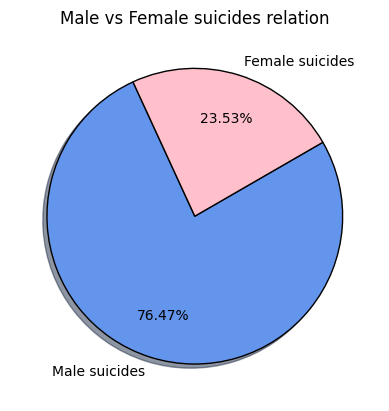

In [17]:
values = [man_percentage, woman_percentage]
labels = ['Male suicides', 'Female suicides']
colors = ["cornflowerblue", "pink"]
wedge_properties = {"edgecolor":"k",'linewidth': 1}
plt.pie(values, labels=labels, colors=colors, startangle=30,
           counterclock=False, shadow=True, wedgeprops=wedge_properties,
           autopct="%1.2f%%", pctdistance=0.7)
plt.title("Male vs Female suicides relation")

plt.show()

That's an insane difference. I knew before the EDA that men tend to commit suicide more than women, but it's actually a lot more.

## What is the most popular suicide age-rank among men and women?

We can answer this question using the variables of **man_suicides** and **woman_suicides** from the last question.

In [18]:
man_suicides_by_age = man_suicides.groupby('age')['suicides_no'].sum().reset_index()
woman_suicides_by_age = woman_suicides.groupby('age')['suicides_no'].sum().reset_index()
man_suicides_by_age

,age,suicides_no
0,15-24 years,684300.0
1,25-34 years,978490.0
2,35-54 years,2049269.0
3,5-14 years,39727.0
4,55-74 years,1311736.0
5,75+ years,477335.0


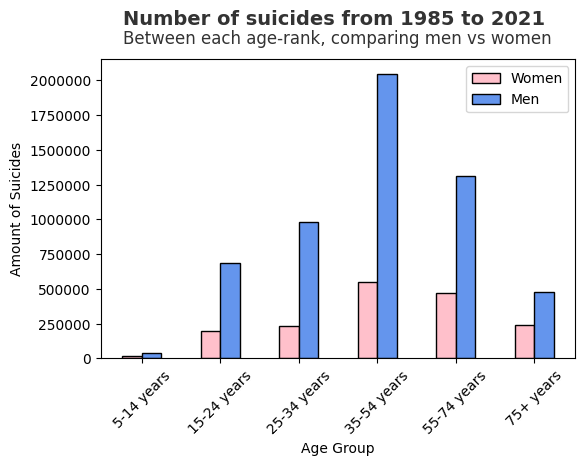

In [19]:
X = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

Ygirls = []
Zboys = []

# add all the values from each age-rank
for x in X:
  woman_value = pd.to_numeric(woman_suicides_by_age.loc[woman_suicides_by_age['age'] == x, 'suicides_no']).item()
  man_value = pd.to_numeric(man_suicides_by_age.loc[man_suicides_by_age['age'] == x, 'suicides_no']).item()
  Ygirls.append(woman_value)
  Zboys.append(man_value)

n=len(X)
r = np.arange(n)
width = 0.25

# make the subplots
fig, ax = plt.subplots()
ax.bar(r - width/2, Ygirls, color='pink', width=width, edgecolor='black', label='Women')
ax.bar(r + width/2, Zboys, color='cornflowerblue', width=width, edgecolor='black', label='Men')

plt.xticks(r, X, rotation=45)
plt.xlabel("Age Group")
plt.ylabel("Amount of Suicides")

plt.legend()

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

ax.text(x=0.2, y=.93, s="Number of suicides from 1985 to 2021", transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.2, y=.89, s="Between each age-rank, comparing men vs women", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

plt.subplots_adjust(left=0.2, right=0.8, top=0.85, bottom=0.15)

plt.tight_layout()
plt.show()

## How the GDP per capita affects the suicide rate?

To answer this question, we need to see if theres exist a correlation between the GDP per Capita and the suicide rate, for each country.

In [20]:
rates = suicides.groupby('country')['suicides/100k pop'].mean().reset_index() # mean of suicide rates for each country
gdp = suicides.groupby('country')['gdp_per_capita ($)'].mean().reset_index() # mean of gdp per capita for each country

In [26]:
left = rates.set_index(['country'])
right = gdp.set_index(['country'])
rates_gdp = left.join(right)
rates_gdp.head(5)

,suicides/100k pop,gdp_per_capita ($)
country,,
Albania,3.502879,1859.045455
Antigua and Barbuda,0.481559,11146.243943
Argentina,9.324805,8296.595912
Armenia,2.836908,2203.747951
Aruba,9.503095,24221.642857


In [28]:
correlation = rates_gdp['gdp_per_capita ($)'].corr(rates_gdp['suicides/100k pop'])
print(correlation)

0.058425584922875744


We can see a weak correlation between these 2 variables. Let's see how is the gdp per capita of the 15 countries with the higher suicide rate.

In [30]:
rates_gdp = rates_gdp.sort_values(by='suicides/100k pop', ascending=False)
rates_gdp.head(15)

,suicides/100k pop,gdp_per_capita ($)
country,,
Republic of Korea,45.869891,18218.854631
Sri Lanka,35.295152,904.272727
Lithuania,34.468115,10778.913095
Russian Federation,30.449826,7085.163193
Hungary,28.507057,10251.188941
Kazakhstan,26.589384,5885.067898
Belarus,26.167581,3816.784126
Latvia,24.792562,10293.949966
Slovenia,23.619350,19700.293318


The gdp per capita of these countries is really varied. Now, let's see the suicide rates of the 15 countries with the higher gdp per capita.

In [31]:
rates_gdp = rates_gdp.sort_values(by='gdp_per_capita ($)', ascending=False)
rates_gdp.head(15)

,suicides/100k pop,gdp_per_capita ($)
country,,
Luxembourg,14.722200,73974.337969
Qatar,1.787360,67756.449438
Switzerland,16.060675,66591.561980
United States of America,0.388990,63011.761697
Norway,12.941000,57319.600000
San Marino,4.045000,53663.666667
Denmark,11.993086,50947.656868
Sweden,12.985351,42751.588403
Iceland,11.471912,42556.407313


We have varied results too. We can't really say that gdp_per_capita and suicides rate have a correlation. The suicide rate / 100k population of a country is a complex number, that is probably affected by several factors. Now, i want to see the correlation between HDI and suicide rates, maybe it has a bigger impact than the GDP per capita.
* HDI is the human development index.

In [32]:
len(suicides)

31756

In [33]:
suicides['HDI for year'].isnull().sum()

19456

We have a problem. We have a lot of null values, so it's going to be difficult to calculate a real correlation. Nevertheless, let's use the rows with real values, without filling the nulls with 0, because that would decrease a lot the mean of HDI for year.

In [35]:
# create a df with only with the rows that have a not null value for HDI
suicides_hdi = suicides.loc[(suicides['HDI for year'].notnull())]
len(suicides_hdi)

12300

In [37]:
hdi = suicides_hdi.groupby('country')['HDI for year'].mean().reset_index()
suicide_rates_hdi = suicides_hdi.groupby('country')['suicides/100k pop'].mean().reset_index()

In [39]:
left = hdi.set_index(['country'])
right = suicide_rates_hdi.set_index(['country'])
rates_hdi = left.join(right)

In [41]:
correlation = rates_hdi['HDI for year'].corr(rates_hdi['suicides/100k pop'])
print(correlation)

0.17966057501211716


It's more correlationated than GDP per capita, but 0.17 stills being a weak correlation.

## How is the suicide rate in Chile through this time period?

To answer this question, we need to get all the rows with information about Chile, and then plot the suicide rate for every year,.

In [45]:
chile = suicides.loc[(suicides.country == 'Chile')]

In [49]:
# sepparate the data between men and women
chile_males = chile.loc[(chile['sex'] == 'male')]
chile_females = chile.loc[(chile['sex'] == 'female')]

# calculate the mean of suicide_rates for each year
male_rates = chile_males.groupby('year')['suicides/100k pop'].mean().reset_index()
female_rates = chile_females.groupby('year')['suicides/100k pop'].mean().reset_index()

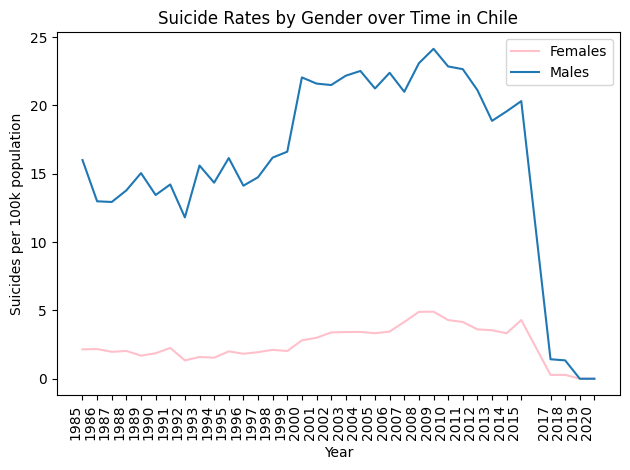

In [75]:
Ygirls = []
Zboys = []
years = male_rates['year'].values

# add all the values from each age-rank
for y in years:
  woman_value = pd.to_numeric(female_rates.loc[female_rates['year'] == y, 'suicides/100k pop']).item()
  man_value = pd.to_numeric(male_rates.loc[male_rates['year'] == y, 'suicides/100k pop']).item()
  Ygirls.append(woman_value)
  Zboys.append(man_value)

plt.plot(years, Ygirls, label = "Females", color='pink')
plt.plot(years, Zboys, label = "Males")


plt.xticks(years, rotation=90, ha='right')
plt.xlabel("Year")
plt.ylabel("Suicides per 100k population")
plt.title("Suicide Rates by Gender over Time in Chile")
plt.legend()


plt.tight_layout()
plt.show()

The plot shows the evolution of suicide rates for males and females throughout the period of time. Sadly, we don't have the data of 2016.
